In [37]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('ITSA4.SA_Train.csv')
dataset_train = dataset_train[dataset_train['Open'] != 'null']
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

/home/clarissa/.local/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [64]:
# Part 2 - Building the RNN with LSTM

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
440/440 [==============================] - 12s 27ms/step - loss: 0.0512
Epoch 2/20
440/440 [==============================] - 3s 7ms/step - loss: 0.0182
Epoch 3/20
440/440 [==============================] - 3s 7ms/step - loss: 0.0154
Epoch 4/20
440/440 [==============================] - 3s 7ms/step - loss: 0.0153
Epoch 5/20
440/440 [==============================] - 3s 7ms/step - loss: 0.0171
Epoch 6/20
440/440 [==============================] - 3s 7ms/step - loss: 0.0143
Epoch 7/20
440/440 [==============================] - 5s 12ms/step - loss: 0.0146
Epoch 8/20
440/440 [==============================] - 4s 9ms/step - loss: 0.0130
Epoch 9/20
440/440 [==============================] - 5s 10ms/step - loss: 0.0129
Epoch 10/20
440/440 [==============================] - 4s 10ms/step - loss: 0.0122
Epoch 11/20
440/440 [==============================] - 4s 9ms/step - loss: 0.0122
Epoch 12/20
440/440 [==============================] - 4s 8ms/step - loss: 0.0119
Epoch 13/20
440/440 

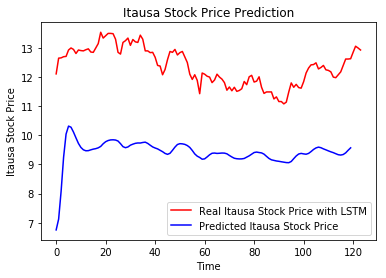

In [65]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('ITSA4.SA_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 180):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Itausa Stock Price with LSTM')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Itausa Stock Price')
plt.title('Itausa Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Itausa Stock Price')
plt.legend()
plt.show()

In [62]:
# Part 4 - Building the RNN with GRU

# Importing the Keras libraries and packages
from keras.layers import GRU

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
440/440 [==============================] - 11s 24ms/step - loss: 0.0388
Epoch 2/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0157
Epoch 3/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0160
Epoch 4/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0125
Epoch 5/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0124
Epoch 6/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0154
Epoch 7/20
440/440 [==============================] - 2s 6ms/step - loss: 0.0106
Epoch 8/20
440/440 [==============================] - 2s 6ms/step - loss: 0.0093
Epoch 9/20
440/440 [==============================] - 2s 6ms/step - loss: 0.0084
Epoch 10/20
440/440 [==============================] - 2s 6ms/step - loss: 0.0084
Epoch 11/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0074
Epoch 12/20
440/440 [==============================] - 2s 6ms/step - loss: 0.0090
Epoch 13/20
440/440 [==

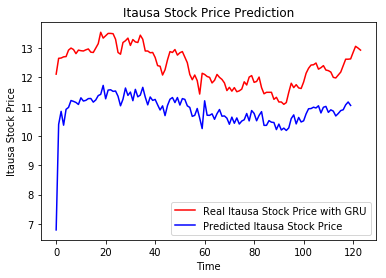

In [63]:
# Part 5 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('ITSA4.SA_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 180):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Itausa Stock Price with GRU')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Itausa Stock Price')
plt.title('Itausa Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Itausa Stock Price')
plt.legend()
plt.show()